In [1]:
# import modules and libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import sklearn
import sklearn.linear_model as lm
#import sklearn.grid_search as gs
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# read data
df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [3]:
# check data
df.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [4]:
# check for nulls
df.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [5]:
# get basic stats from data
df.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [6]:
# get shape of dataframe
df.shape

(3242, 17)

In [7]:
# get data types and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [8]:
# collect column names into a list
cols=list(df)

In [9]:
# view column names
cols

['cvd_4types',
 'age_s1',
 'race',
 'educat',
 'mstat',
 'hip',
 'neck20',
 'waist',
 'av_weight_kg',
 'cgpkyr',
 'tea15',
 'srhype',
 'parrptdiab',
 'bend25',
 'happy25',
 'tired25',
 'hlthlm25']

In [10]:
# column explanations
# cvd_4types: cardio vascular risk (0 - no risk, 1 - risk)
# age_s1: age in years
# race: race (1 - white, 2 - black, 3 - other)
# educat: education ( 1 - <10 years, 2 - 11-15 years, 3 - 16-20, 4- >20 )
# mstat: marital status ( 1 - married, 2 - widowed, 3 - divorced/separated, 4 - never married, 8 - unknow/refused)
# hip: hip circumference in cm
# neck20: neck circumference in cm
# waist: waist circumference in cm
# av_weight_kg: weight in kg
# cgpkyr: cigarette packs-years (packs per day x years as smoker)
# tea15: cups of tea per day
# srhype: self reported hypertension ( 0 - no, 1 - yes )
# parrptdiab: parent cohort reported diabetes ( 0 - no, 1 - yes)
# bend25: quality of life - bending, kneeling, stooping ( 1 - yes(a lot), 2 - yes(a little), 3 - no)
# happy25: feeling happy ( 1 - all of time, 2 - most of time, 3 - a good bit of time, 4 - some of the time, 5 - a little of time, 6 - none of time)
# tired25: feeling tired  ( 1 - all of time, 2 - most of time, 3 - a good bit of time, 4 - some of the time, 5 - a little of time, 6 - none of time)
# hlthlm25: health limited social activites  ( 1 - all of time, 2 - most of time, 3 - some of the time, 4 - a little of time, 5 - none of time)


In [11]:
# check to see if data is weighted evenly
df['cvd_4types'].value_counts()

1    1913
0    1329
Name: cvd_4types, dtype: int64

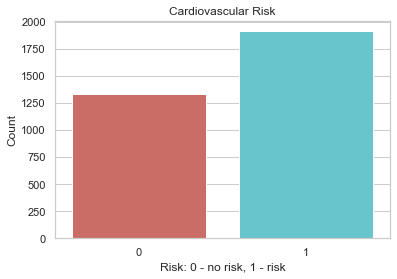

In [12]:
# visually inspect relationships between data
sns.countplot(x='cvd_4types',data=df, palette='hls')
plt.savefig('count_plot')
plt.title('Cardiovascular Risk')
plt.xlabel('Risk: 0 - no risk, 1 - risk')
plt.ylabel('Count')
plt.show()

In [13]:
# return numeric value for cardiovascular risk
count_no_risk=len(df[df['cvd_4types']==0])
count_risk=len(df[df['cvd_4types']==1])
print("Percent with Risk: {0:0.1f}%".format(count_risk/(count_risk+count_no_risk)*100))

Percent with Risk: 59.0%


Text(0, 0.5, 'Frequency')

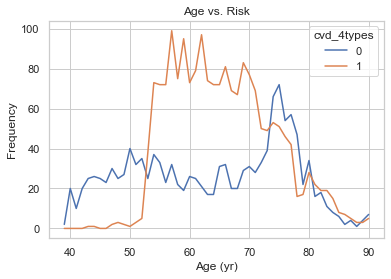

In [14]:
# visually inspect relationships between data
%matplotlib inline
pd.crosstab(df.age_s1,df.cvd_4types).plot()
plt.title('Age vs. Risk')
plt.xlabel('Age (yr)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

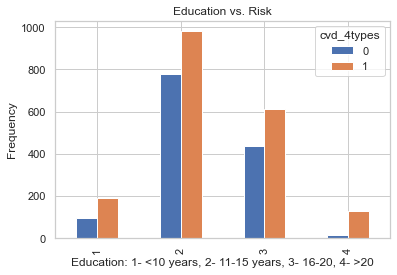

In [15]:
# visually inspect relationships between data
%matplotlib inline
pd.crosstab(df.educat,df.cvd_4types).plot(kind='bar')
plt.title('Education vs. Risk')
plt.xlabel('Education: 1- <10 years, 2- 11-15 years, 3- 16-20, 4- >20')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

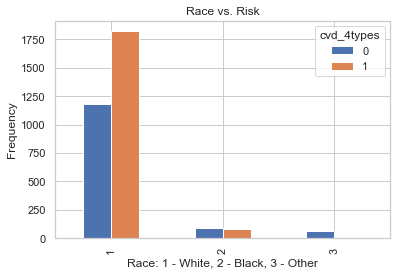

In [16]:
# visually inspect relationships between data
%matplotlib inline
pd.crosstab(df.race,df.cvd_4types).plot(kind='bar')
plt.title('Race vs. Risk')
plt.xlabel('Race: 1 - White, 2 - Black, 3 - Other')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

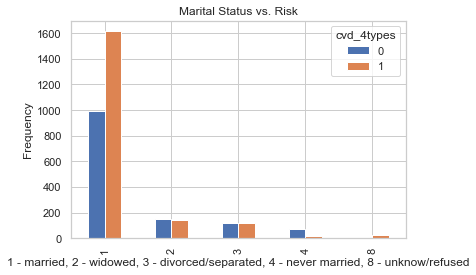

In [17]:
# visually inspect relationships between data
%matplotlib inline
pd.crosstab(df.mstat,df.cvd_4types).plot(kind='bar')
plt.title('Marital Status vs. Risk')
plt.xlabel('1 - married, 2 - widowed, 3 - divorced/separated, 4 - never married, 8 - unknow/refused')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

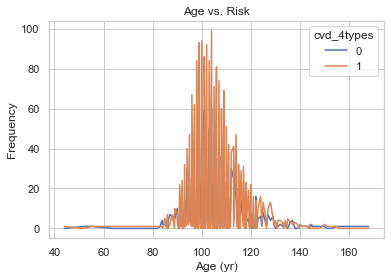

In [18]:
# visually inspect relationships between data
%matplotlib inline
pd.crosstab(df.hip,df.cvd_4types).plot()
plt.title('Age vs. Risk')
plt.xlabel('Age (yr)')
plt.ylabel('Frequency')

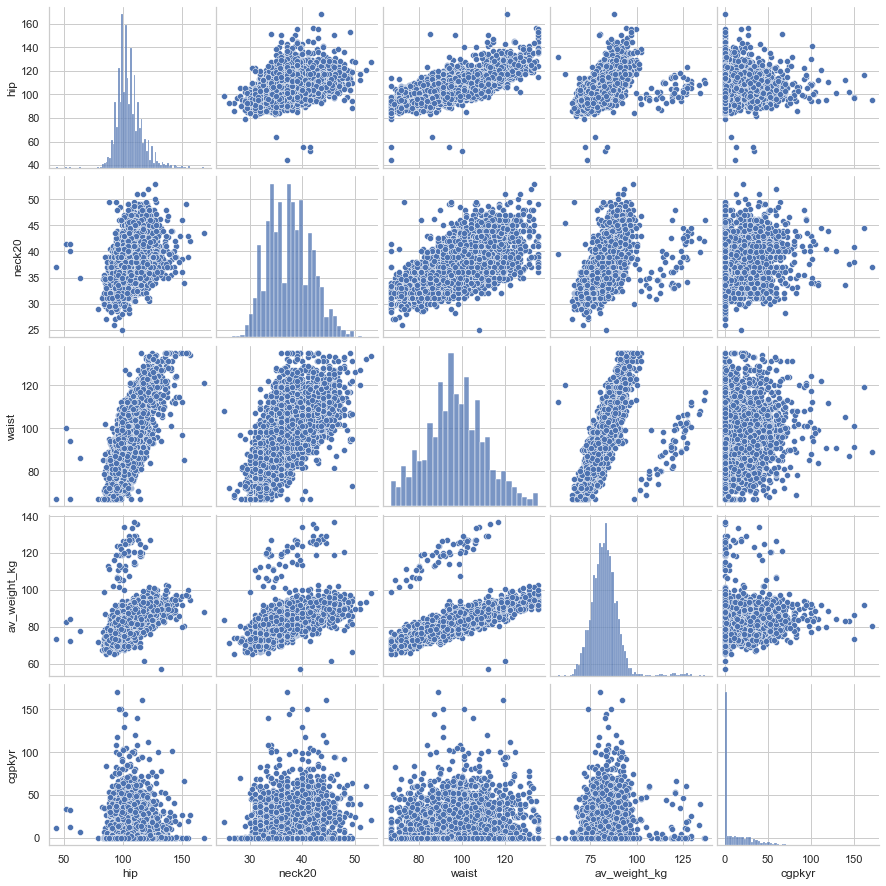

In [19]:
# visualize correlations between numeric data
data=df.select_dtypes(include=['float64'])
sns.pairplot(data)

In [20]:
# remove results from features list
to_be_removed='cvd_4types'
cols=[i for i in cols if i not in to_be_removed]
cols

['age_s1',
 'race',
 'educat',
 'mstat',
 'hip',
 'neck20',
 'waist',
 'av_weight_kg',
 'cgpkyr',
 'tea15',
 'srhype',
 'parrptdiab',
 'bend25',
 'happy25',
 'tired25',
 'hlthlm25']

In [21]:
# seperate factors from results
X = df[cols]
y = df['cvd_4types']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [22]:
X

,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4


In [27]:
# fitting logistic regression model
%%time
model = LogisticRegression()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')
rfecv.fit(X, y)

C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Wall time: 5.75 s


C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFECV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

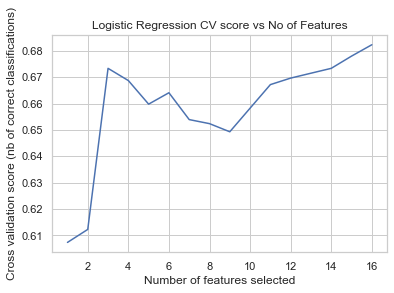

In [28]:
# showing results of regression vs. number of features
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [29]:
# feature list
feature_importance = list(zip(X.columns, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20', 'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab', 'bend25', 'happy25', 'tired25', 'hlthlm25']


In [58]:
# feature rank
pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

,Rank
race,1
educat,1
mstat,1
hip,1
neck20,1
waist,1
av_weight_kg,1
tea15,1
srhype,1
parrptdiab,1


In [30]:
# Calculate accuracy scores 
X_new = X[new_features]
initial_score = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(model, X_new, y, cv=cv, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Initial accuracy : 0.6822981956315289 


C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy after Feature Selection : 0.6822981956315289 


In [31]:
# model accuracy score
print('Initial accuracy: {0}, Accuracy after Feature Selection: {1}'.format(initial_score,fe_score))

Initial accuracy: 0.6822981956315289, Accuracy after Feature Selection: 0.6822981956315289


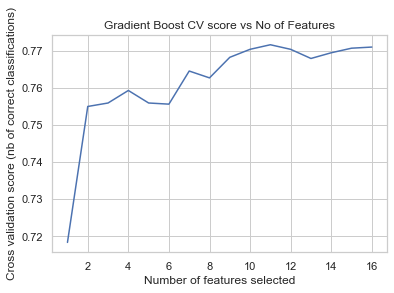

Wall time: 50.1 s


In [32]:
# fitting gradient boosing classifier as a reference
%%time
gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1, cv=cv, scoring='accuracy')
gb_rfecv.fit(X, y)
plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [33]:
# feature list
feature_importance = list(zip(X.columns, gb_rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20', 'waist', 'av_weight_kg', 'cgpkyr', 'parrptdiab', 'hlthlm25']


In [57]:
# feature rank
pd.DataFrame(gb_rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

,Rank
age_s1,1
race,1
educat,1
mstat,1
hip,1
neck20,1
waist,1
av_weight_kg,1
cgpkyr,1
parrptdiab,1


In [34]:
# model accuracy score
X_new_gb = X[new_features]
initial_score = cross_val_score(gb_model, X, y, cv=cv, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(gb_model, X_new_gb, y, cv=cv, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7708100664767331 
Accuracy after Feature Selection : 0.7717454890788225 


In [35]:
# Specify parameters
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

In [36]:
# grid search for improved parameters
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring='accuracy')
grid.fit(X_new, y)

C:\Users\semic\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\semic\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\semic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (sta

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [37]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 8, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=8, multi_class='ovr', penalty='l1', solver='liblinear')


In [38]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')
initial_score = cross_val_score(logreg_new, X_new, y, cv=cv, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))


Final accuracy : 0.687229819563153 


In [39]:
# setting threshold and probabilities level for ROC plot
y_preds=grid.predict(X_test)
y_probas = grid.predict_proba(X_test)[:, 1]
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, y_probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

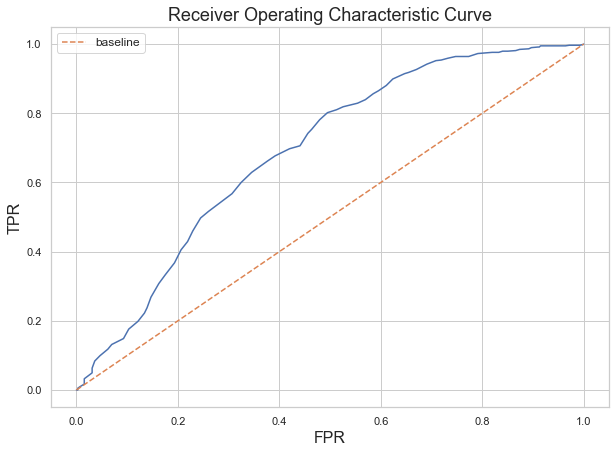

In [40]:
# displaying the ROC curve graph using matplotlib
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

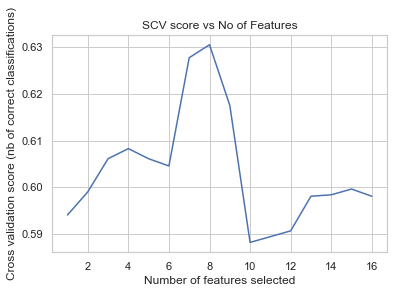

Wall time: 48.9 s


In [53]:
# fitting SCV model classifier as a comparison
%%time
svc = SVC(kernel='linear')
cv=StratifiedKFold(2)
svc_rfecv = RFECV(estimator=svc, step=1, cv=cv, scoring='accuracy')
svc_rfecv.fit(X, y)
plt.figure()
plt.title('SVC score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(svc_rfecv.grid_scores_) + 1), svc_rfecv.grid_scores_)
plt.show()

In [43]:
# feature list
feature_importance = list(zip(X.columns, svc_rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['race', 'educat', 'mstat', 'parrptdiab', 'bend25', 'happy25', 'tired25', 'hlthlm25']


In [56]:
# feature rank
pd.DataFrame(svc_rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

,Rank
race,1
educat,1
mstat,1
parrptdiab,1
bend25,1
happy25,1
tired25,1
hlthlm25,1
waist,2
hip,3


In [46]:
# module accuracy
X_new_svc = X[new_features]
initial_score = cross_val_score(svc, X, y, cv=cv, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(svc_mod, X_new_svc, y, cv=cv, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.5980876002467612 
Accuracy after Feature Selection : 0.6011721159777914 
